<a href="https://colab.research.google.com/github/HermitCrab07/Impact_of_HbA1c_on_Readmission_Rates/blob/main/_6_STXLEARNERS_Diabetes_130US_Hospitals_1999_2008_3_CAUSAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore
# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records
# BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.
# Dataset was downloaded from UCI Machine Learning Repository.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore
# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records
# BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.
# Dataset was downloaded from UCI Machine Learning Repository.

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Analysis_Diabetes_Dataset_CausalInference/reanalysis_diabetes_dataset.csv')
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Treatment,Insured,Readmission
count,7.151800e+04,7.151800e+04,71518.000000,71518.000000,71518.000000,71518.00000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,1.568156e+08,5.505160e+07,2.100254,3.593235,5.657457,4.28913,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700,0.215163,0.565941,0.398962
std,1.003769e+08,3.947573e+07,1.508301,5.269771,4.162580,2.94921,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674,0.410938,0.495636,0.489688
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.145807e+07,2.337577e+07,1.000000,1.000000,1.000000,2.00000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,1.440574e+08,4.816680e+07,1.000000,1.000000,7.000000,3.00000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,2.155513e+08,8.752222e+07,3.000000,3.000000,7.000000,6.00000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.00000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,1.000000,1.000000,1.000000




---

A. CAUSAL ANALYSIS #1. PROPENSITY SCORES TO PREDICT PERCENTILES OF PROBABILITY OF GETTING TREATMENT (HBA1C MEASUREMENT) OR NOT AND THEN COMPUTING THE DIFFERENT BETWEEN TREATMENT AND CONTROL IN EACH PERCENTILE.

---



Basic computation of the Readmission Rates (< 30) shows that Readmission Rate in Treatment Group was slightly higher than Control.



In [3]:
# Calculate readmission rates for each group
treatment_readmission_rate = (df[df['Group'] == 'Treatment']['readmitted'] == '<30').mean()  # Treatment group
control_readmission_rate = (df[df['Group'] == 'Control']['readmitted'] == '<30').mean()   # Control group


# Calculate the difference in readmission rates
readmission_rate_difference = treatment_readmission_rate - control_readmission_rate

# Print the results
print("Readmission Rate (Treatment):", treatment_readmission_rate)
print("Readmission Rate (Control):", control_readmission_rate)
print("Difference in Readmission Rates:", readmission_rate_difference)

Readmission Rate (Treatment): 0.10163763971926176
Readmission Rate (Control): 0.0842508462497773
Difference in Readmission Rates: 0.017386793469484463


Basic computation of the Readmission Rates (>30) shows that Readmission Rate in Treatment Group was slightly higher again than Control.


In [4]:
# Calculate readmission rates for each group
treatment_readmission_rate = (df[df['Group'] == 'Treatment']['readmitted'] == '>30').mean()  # Treatment group
control_readmission_rate = (df[df['Group'] == 'Control']['readmitted'] == '>30').mean()   # Control group


# Calculate the difference in readmission rates
readmission_rate_difference = treatment_readmission_rate - control_readmission_rate

# Print the results
print("Readmission Rate (Treatment):", treatment_readmission_rate)
print("Readmission Rate (Control):", control_readmission_rate)
print("Difference in Readmission Rates:", readmission_rate_difference)

Readmission Rate (Treatment): 0.3721731219131791
Readmission Rate (Control): 0.2941920541599857
Difference in Readmission Rates: 0.07798106775319336


Treatment vs. Control Readmission Rates for Readmission in each the 7 groups created by propensity scores


In [5]:
# Propensity Scores

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Covariates used in paper
# X_covariates_in_paper = df[['discharge', 'race', 'admission', 'medical_specialty', 'time_in_hospital', 'age', 'diagnoses', 'HbA1c']]

df['Insured_Treatment_int'] = df['Insured'] * df['Treatment']

X_covariates_in_treat = df[['num_procedures', 'number_emergency','num_medications', 'Insured', 'Treatment', 'Insured_Treatment_int']]
y = df['Readmission']

# Add a constant term for the intercept
X_covariates_in_treat = sm.add_constant(X_covariates_in_treat)

y = df['Readmission']

# Create and fit the statsmodels logistic regression model
model = sm.Logit(y, X_covariates_in_treat)
results = model.fit()

# Print the summary, which includes p-values
print(results.summary())

# Get the Propensity Scores
propensity_scores = results.predict(exog=X_covariates_in_treat)  # Use the fitted model to predict propensity scores

# Add Propensity Scores to DataFrame
df['propensity_score'] = propensity_scores

Optimization terminated successfully.
         Current function value: 0.663388
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Readmission   No. Observations:                71518
Model:                          Logit   Df Residuals:                    71511
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                 0.01368
Time:                        21:06:38   Log-Likelihood:                -47444.
converged:                       True   LL-Null:                       -48102.
Covariance Type:            nonrobust   LLR p-value:                3.547e-281
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5306      0.020    -27.058      0.000      -0.569      -0.

In [6]:
import pandas as pd

# Create propensity score percentiles and assign groups
df['propensity_group'] = pd.qcut(df['propensity_score'], 5, labels=False, duplicates='drop')

# Calculate readmission rates for Treatment and Control within each propensity group
readmission_rates_treatment = df[df['Group'] == 'Treatment'].groupby('propensity_group')['Readmission'].mean()
readmission_rates_control = df[df['Group'] == 'Control'].groupby('propensity_group')['Readmission'].mean()

# Calculate the difference in readmission rates within each propensity group
readmission_rate_difference_by_group = readmission_rates_treatment - readmission_rates_control

print("Readmission Rates (Treatment):\n", readmission_rates_treatment)
print("\nReadmission Rates (Control):\n", readmission_rates_control)
print("\nDifference in Readmission Rates:\n", readmission_rate_difference_by_group)

for group in df['propensity_group'].unique():
    print(f"\nPropensity Group: {group}")
    print(df[df['propensity_group'] == group]['Group'].value_counts())

Readmission Rates (Treatment):
 propensity_group
1    0.526316
2    0.441472
3    0.436165
4    0.488767
Name: Readmission, dtype: float64

Readmission Rates (Control):
 propensity_group
0    0.312570
1    0.371213
2    0.382941
3    0.425562
4    0.532094
Name: Readmission, dtype: float64

Difference in Readmission Rates:
 propensity_group
0         NaN
1    0.155103
2    0.058530
3    0.010603
4   -0.043326
Name: Readmission, dtype: float64

Propensity Group: 2
Group
Control      14198
Treatment      299
Name: count, dtype: int64

Propensity Group: 4
Group
Treatment    10950
Control       3334
Name: count, dtype: int64

Propensity Group: 3
Group
Control      9968
Treatment    4120
Name: count, dtype: int64

Propensity Group: 1
Group
Control      14326
Treatment       19
Name: count, dtype: int64

Propensity Group: 0
Group
Control    14304
Name: count, dtype: int64


In summary - propensity score stratification doesn't really work. There are groups with no one in the Treatment Group or too few. Should try a different method.

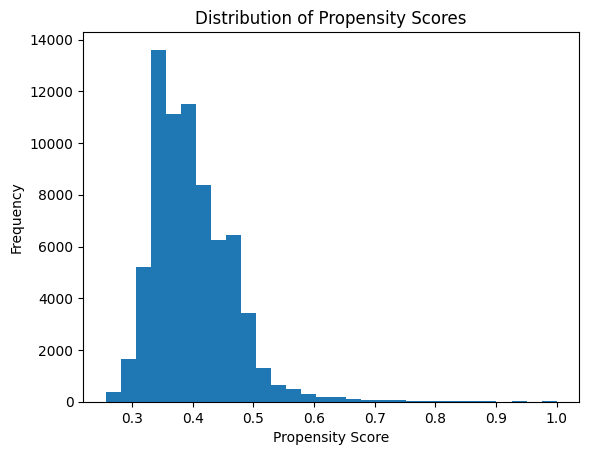

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['propensity_score'], bins=30)
plt.title('Distribution of Propensity Scores')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.show()




---

B. CAUSAL ANALYSIS #2: USE OF INSTRUMENTAL VARIABLES (IV)

---



This is just a think-out-loud section. Do the following IV I am considering - [1] Payer_Code [2] Medical_Specialty of the doctor meet the following criteria for IV? Let's just take Insurance to begin with -

1. Relevance? This criteria is met. It's true that changes in payer_code (Insurance) can be associated with HbA1C being ordered or not.

2. Exogeneity? MUST be independent of effect on readmission EXCEPT via the order of the HbA1C. This is not met, I don't think. Insurance is for sure associated with whether or not a patient is readmitted.

Different payers might have varying policies or incentives that affect readmission rates, quite independent of HbA1C testing. Medical_specialty: The admitting physician's specialty could be indicative of patient's health condition or the severity, which could influence readmission rates.

Instrument Validity has two key issues that are important, IMO - relevance and exogeneity.

Relevance: If variables influence the likelihood of measurement by a HbA1C test (Treatment), is there a strong correlation? If the relationship is weak, the instruments are considered "weak" and the analysis is unreliable.

Exogeneity: This is the critical assumption that the instruments affect the outcome (Readmission) only through their effect on the treatment (HbA1C test) and not through any other pathways. This is a very difficult assumption to make - it's hard to make the argument that lack of insurance is a completely unimportant issue for Readmission.

In essence, IV analysis is hard to evaluate, IMO. While payer_code might seem like a reason that affects Readmission, the validity needs to be  assessed before drawing causal conclusions.

Doesn't seem like a good path to explore, IMO.

In [8]:
df['payer_code'].value_counts()

,count
payer_code,
?,31043
MC,20414
HM,4022
BC,3432
SP,3347
MD,2197
CP,1986
UN,1879
CM,1334




---


Let's assume that if there is a payer_code, the patient has insurance and there is no payer_code, there is NO insurance. Not sure that this is a correct assumption, but a fair one. If a patient HAS insurance, why wouldn't he/she use it?


---

In [9]:
# Create a cross-tabulation with percentages
insured_by_group = pd.crosstab(df['Group'], df['Insured'], normalize='index') * 100

# Print the results
print(insured_by_group)

Insured            0          1
Group                          
Control    44.033494  55.966506
Treatment  41.116454  58.883546




---


Note: Percent of Insured individuals in Control Group is 56% and Treatment Group is 59%. So a bit more in the Treatment Group compared to the Control. Is that - could that be - the reason why more people have the HbA1C ordered or measured?


---



In [10]:
# Calculate the percentage of insured individuals in the control group
control_insured_percent = (df[df['Group'] == 'Control']['Insured'] == 1).mean() * 100

# Calculate the percentage of insured individuals in the treatment group
treatment_insured_percent = (df[df['Group'] == 'Treatment']['Insured'] == 1).mean() * 100

# Print the results
print(f"Percentage of Insured Individuals in Control Group: {control_insured_percent:.0f}")
print(f"Percentage of Insured Individuals in Treatment Group: {treatment_insured_percent:.0f}")

Percentage of Insured Individuals in Control Group: 56
Percentage of Insured Individuals in Treatment Group: 59


In [11]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = [[(df[df['Group'] == 'Control']['Insured'] == 1).sum(), (df[df['Group'] == 'Control']['Insured'] == 0).sum()],
                    [(df[df['Group'] == 'Treatment']['Insured'] == 1).sum(), (df[df['Group'] == 'Treatment']['Insured'] == 0).sum()]]

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2:.2f}")
print("P-value:", p)
print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

Chi-squared statistic: 41.72
P-value: 1.0559205329617874e-10
Degrees of freedom: 1


In [12]:
insured_table = pd.crosstab(
    index=[df['Group'], df['Readmission']],
    columns=df['Insured'],
    normalize='index'  # Calculate percentages row-wise
) * 100
insured_table = insured_table[1]  # Select only the column for insured = 1
insured_table = insured_table.unstack()  # Reshape for better readability

# Table for uninsured individuals (insured = 0)
uninsured_table = pd.crosstab(
    index=[df['Group'], df['Readmission']],
    columns=df['Insured'],
    normalize='index'
) * 100
uninsured_table = uninsured_table[0]  # Select only the column for insured = 0
uninsured_table = uninsured_table.unstack()

# Display the tables
print("\nReadmission Rates for Insured Individuals (insured = 1):\n", insured_table)
print("\nReadmission Rates for Uninsured Individuals (insured = 0):\n", uninsured_table)


Readmission Rates for Insured Individuals (insured = 1):
 Readmission          0          1
Group                            
Control      57.873767  52.834008
Treatment    59.417068  58.291044

Readmission Rates for Uninsured Individuals (insured = 0):
 Readmission          0          1
Group                            
Control      42.126233  47.165992
Treatment    40.582932  41.708956


In [13]:
# Create the cross-tabulation with row percentages
cross_tab = pd.crosstab(df['insulin'], df['metformin'], normalize='index') * 100

# Print the crosstab
print(cross_tab)

metformin      Down         No     Steady        Up
insulin                                            
Down       0.652898  82.958028  15.149900  1.239174
No         0.526904  78.113456  20.394605  0.965035
Steady     0.727552  78.774459  19.178454  1.319535
Up         0.588827  80.295849  17.449375  1.665949


In [14]:
# Create a multi-index cross-tabulation
cross_tab = pd.crosstab([df['Group'], df['insulin']], df['metformin'], normalize='index') * 100

# Print the cross-tabulation
print(cross_tab)

metformin              Down         No     Steady        Up
Group     insulin                                          
Control   Down     0.489182  84.440263  14.223895  0.846660
          No       0.508299  78.845090  19.785615  0.860996
          Steady   0.671454  79.634495  18.678111  1.015940
          Up       0.587248  81.501678  16.757550  1.153523
Treatment Down     1.050228  79.360731  17.397260  2.191781
          No       0.616564  74.587569  23.329445  1.466422
          Steady   0.919632  75.829668  20.891643  2.359056
          Up       0.592255  77.676538  18.952164  2.779043




---
Summary: 31% are Readmitted after 30 days and only 8% within 30 days. Isn't the other group much more important to study? Why do we focus on the < 30 days group in the paper?


---





In [15]:
# Calculate readmission category percentages
readmission_percentages = df['readmitted'].value_counts(normalize=True) * 100

# Print the percentages
print("Readmission Category Percentages:")
print(readmission_percentages)

Readmission Category Percentages:
readmitted
NO     60.103750
>30    31.097066
<30     8.799183
Name: proportion, dtype: float64




---


Summary: Evaluating Readmission Rates in all 3
categories in Control vs. Treatment Group. The percent of Readmission = 1 is higher in the Treatment compared to the Control Group. Why?


---





---


Summary: Evaluating %Insured within Readmission Category (0, <30 = 1, >30 = 2). In the NOT READMITTED GROUP - there were more insured than not, i.e., the same pattern. In the READMITTED IN 30 DAYs GROUP - there were more insured than not. Same pattern for the last group as well.


---



In [16]:
# Create the cross-tabulation with percentages - row wise with Group as denominator
cross_tab = pd.crosstab(df['Group'], df['Readmission'], normalize='index') * 100

# Print the crosstab
print(cross_tab)

Readmission          0          1
Group                            
Control      62.155710  37.844290
Treatment    52.618924  47.381076


In [17]:
# Create the cross-tabulation with percentages computed row wise - i.e., using readmission as denominator
cross_tab = pd.crosstab(df['Readmission'], df['Insured'], normalize='index') * 100

# Print the crosstab
print(cross_tab)

Insured              0          1
Readmission                      
0            41.835524  58.164476
1            45.771563  54.228437




---


Summary: Hard to believe that % of readmitted in control group (HbA1C is not measured) is less than treatment group (HbA1C). One could make the argument that NOT measuring HbA1C is protective. But need to dive deeper. It could be that fewer are readmitted in Control because fewer are insured.


---



In [18]:
# Calculate the percentage of insured individuals in the control group
control_readmit_percent = (df[df['Group'] == 'Control']['Readmission'] == 1).mean() * 100

# Calculate the percentage of insured individuals in the treatment group
treatment_readmit_percent = (df[df['Group'] == 'Treatment']['Readmission'] == 1).mean() * 100

# Print the results
print(f"Percentage of Readmitted Individuals in Control Group: {control_readmit_percent:.2f}")
print(f"Percentage of Readmitted Individuals in Treatment Group: {treatment_readmit_percent:.2f}")

Percentage of Readmitted Individuals in Control Group: 37.84
Percentage of Readmitted Individuals in Treatment Group: 47.38


In [19]:
# Create the cross-tabulation with percentages computed row wise - i.e., using readmission as denominator
cross_tab = pd.crosstab(df['Readmission'], df['Group'], normalize='index') * 100

# Print the crosstab
print(cross_tab)

Group          Control  Treatment
Readmission                      
0            81.163196  18.836804
1            74.447131  25.552869




---
***
------- IMPORTANT! TO USE ECONML - run the two installs (numpy and shap) and then restart session and install ECONML -------
***

---



In [20]:
# Suggested by Gemini when explaining how to fix the dependency errors - colab has to use an older version of numpy.

# !pip install numpy==1.25.2 --no-cache-dir
# !pip install shap==0.42.1 --no-cache-dir


In [ ]:
!pip install econml --no-cache-dir

In [ ]:
!pip install scikit-learn==1.3.0 --no-cache-dir
from econml.metalearners import SLearner

In [26]:
# Slearner is working - after the above steps - specific numpy and then install econml

from sklearn.ensemble import GradientBoostingRegressor

df['Group_Num'] = df['Group'].map({'Treatment':1, 'Control': 0})

XG = df['Group_Num'].values.ravel() # Change Xg to a 1d
YG = df['Readmission'].values.ravel()  # Change YG to a 1d

est = SLearner(overall_model=GradientBoostingRegressor())
est.fit(YG, XG)

SL_treatment_effects = est.effect(XG.reshape(-1, 1))

print(SL_treatment_effects)

[0.09536533 0.09536533 0.09536533 ... 0.09536533 0.09536533 0.09536533]


Treatment Effects are centered around +0.2 (as the histogram shows) which means the Treatment (which for the purpose of this analysis are the ones with the HbA1C measurement) are SLIGHTLY more likely to be Readmitted (both <30 and >30). THis directly contradicts the results of the paper BUT then again, let's see what we get when we use <30 only as the criteria for Readmission.

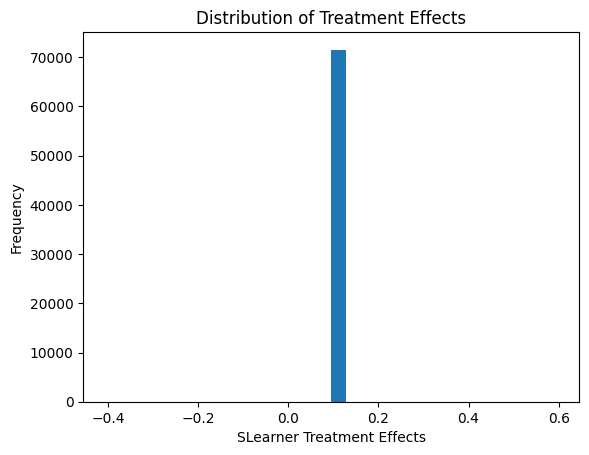

In [27]:
# !pip install matplotlib

import matplotlib.pyplot as plt
plt.hist(SL_treatment_effects, bins=30)
plt.xlabel("SLearner Treatment Effects")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects")
plt.show()

In [34]:
# Tlearner is working - after the above steps - specific numpy and then install econml

from econml.metalearners import TLearner
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X is a DataFrame containing your features:
XG = df[['num_procedures', 'number_emergency','num_medications', 'Insured']]
X = df['Group'].map({'Treatment': 1, 'Control': 0})
est = TLearner(models=GradientBoostingRegressor())

# Pass X to the fit method
est.fit(YG, X, X=XG)

TL_treatment_effects = est.effect(XG) # X should be used here, not XG

print(TL_treatment_effects)

[0.09866314 0.11340787 0.11421036 ... 0.06350965 0.08712443 0.1055634 ]


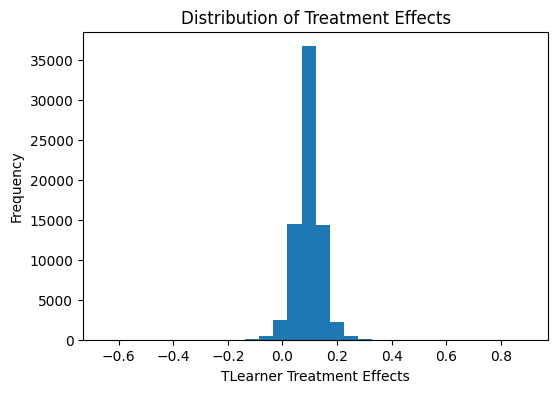

In [35]:
# !pip install matplotlib

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))  # Adjust width and height values

plt.hist(TL_treatment_effects, bins=30)
plt.xlabel("TLearner Treatment Effects")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects")
plt.show()

In [ ]:
!pip install seaborn

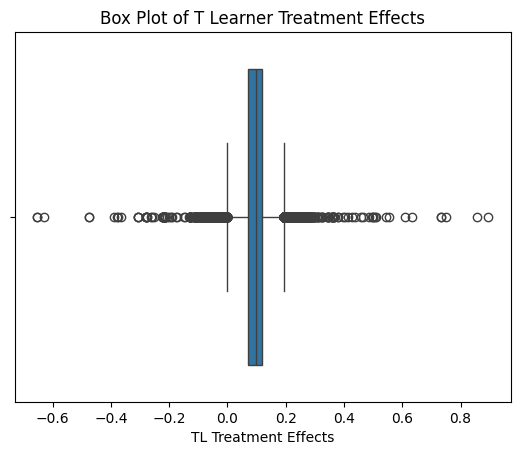

In [37]:
import seaborn as sns
sns.boxplot(x=TL_treatment_effects)
plt.xlabel("TL Treatment Effects")
plt.title("Box Plot of T Learner Treatment Effects")
plt.show()

In [40]:
from econml.metalearners import XLearner
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

df['Group_Numeric'] = df['Group'].map({'Treatment':1, 'Control': 0})

GN = df['Group_Numeric']

est = XLearner(models=GradientBoostingRegressor(),
              propensity_model=GradientBoostingClassifier(),
              cate_models=GradientBoostingRegressor())

est.fit(YG, GN, X=XG)
XL_treatment_effects = est.effect(XG)

print(XL_treatment_effects)

[0.08408518 0.10883429 0.12034932 ... 0.0736418  0.07511118 0.12082691]


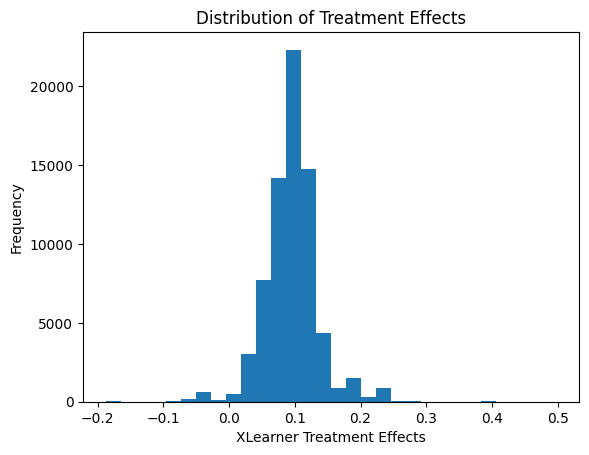

In [41]:
# !pip install matplotlib

import matplotlib.pyplot as plt

plt.hist(XL_treatment_effects, bins=30)
plt.xlabel("XLearner Treatment Effects")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects")
plt.show()

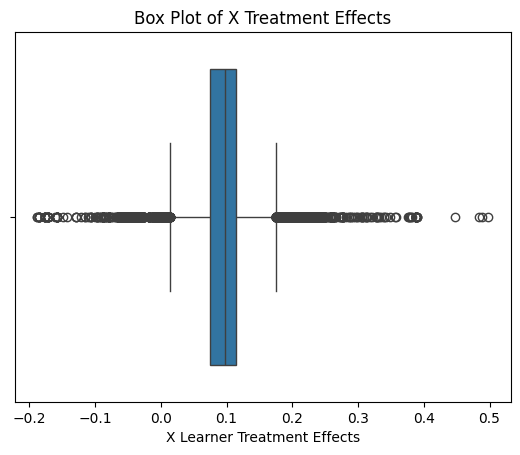

In [42]:
import seaborn as sns
sns.boxplot(x=XL_treatment_effects)
plt.xlabel("X Learner Treatment Effects")
plt.title("Box Plot of X Treatment Effects")
plt.show()

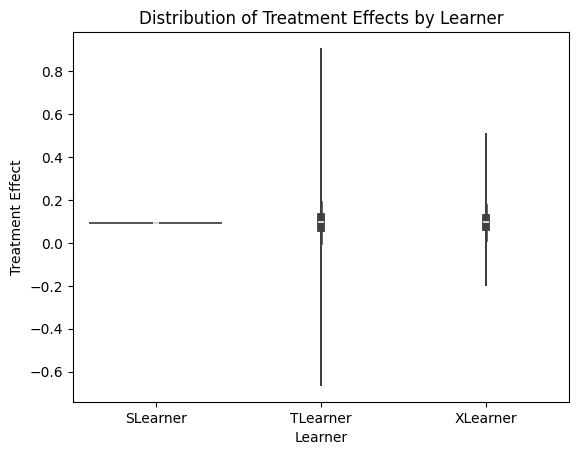

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
import pandas as pd
data = pd.DataFrame({
    'Learner': ['SLearner'] * len(SL_treatment_effects) +
               ['TLearner'] * len(TL_treatment_effects) +
               ['XLearner'] * len(XL_treatment_effects),
    'Treatment Effect': np.concatenate([SL_treatment_effects, TL_treatment_effects, XL_treatment_effects])
})

# Create the violin plot
sns.violinplot(x='Learner', y='Treatment Effect', data=data)
plt.title('Distribution of Treatment Effects by Learner')
plt.show()

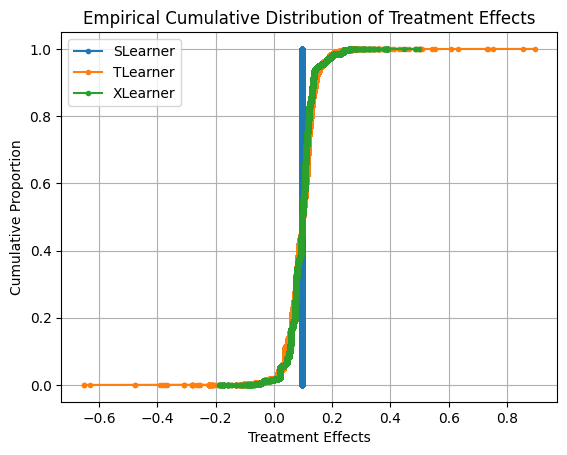

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate ECDFs
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

x_SL, y_SL = ecdf(SL_treatment_effects)
x_TL, y_TL = ecdf(TL_treatment_effects)
x_XL, y_XL = ecdf(XL_treatment_effects)

# Plot ECDFs
plt.plot(x_SL, y_SL, marker='.', linestyle='-', label='SLearner')
plt.plot(x_TL, y_TL, marker='.', linestyle='-', label='TLearner')
plt.plot(x_XL, y_XL, marker='.', linestyle='-', label='XLearner')

# Customize plot
plt.xlabel("Treatment Effects")
plt.ylabel("Cumulative Proportion")
plt.title("Empirical Cumulative Distribution of Treatment Effects")
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [45]:
# Find indices of highest and lowest treatment effects for each learner
highest_SL_index = np.argmax(SL_treatment_effects)
lowest_SL_index = np.argmin(SL_treatment_effects)

highest_TL_index = np.argmax(TL_treatment_effects)
lowest_TL_index = np.argmin(TL_treatment_effects)

highest_XL_index = np.argmax(XL_treatment_effects)
lowest_XL_index = np.argmin(XL_treatment_effects)


# Print results
print("S Learner:")
print("Highest treatment effect:", SL_treatment_effects[highest_SL_index], "at index", highest_SL_index)
print("Lowest treatment effect:", SL_treatment_effects[lowest_SL_index], "at index", lowest_SL_index)

print("\nT Learner:")
print("Highest treatment effect:", TL_treatment_effects[highest_TL_index], "at index", highest_TL_index)
print("Lowest treatment effect:", TL_treatment_effects[lowest_TL_index], "at index", lowest_TL_index)


print("\nX Learner:")
print("Highest treatment effect:", XL_treatment_effects[highest_XL_index], "at index", highest_XL_index)
print("Lowest treatment effect:", XL_treatment_effects[lowest_XL_index], "at index", lowest_XL_index)


S Learner:
Highest treatment effect: 0.09536532811887277 at index 0
Lowest treatment effect: 0.09536532811887277 at index 0

T Learner:
Highest treatment effect: 0.8954735732211623 at index 42446
Lowest treatment effect: -0.6525776549201525 at index 18979

X Learner:
Highest treatment effect: 0.4981970642054977 at index 48031
Lowest treatment effect: -0.18761517466769562 at index 18979




---
So insurance is an interaction effect - i.e., it moderates the effect of Treatment on Outcome. In other words it changes the way Treatment (i.e., measurement of HbA1c) affects readmission rates. If a person is Insured - then Treatment increases the probability of Readmission. If a person is not Insured - then Treatment decreases the probability. In case of the Insured - Treatment might look like a 'Risk' for Readmission (which we know it isn't). In case of the Uninsured - Treatment looks like it's 'Protective' for Readmission (which we again know it isn't). What is really driving it is cost considerations as in the US, risk of medical bankruptcy (declaring bankruptcy due to medical bills) is very high.

Using the backdoor criterion is a concept from causal inference that helps identify whether a control variable blocks all backdoor paths from a treatment (measurement of HbA1c) to an outcome (readmission). In other words, given our example and diabetes data it would be saying that once we condition on Insurance, there is no relationship between Treatment and Outcome.

It is hard to imagine that would be the truth. I would like to think that readmitting a patient is not purely a matter of whether or not the patient has insurance. Could it be that presence or the absence of Insurance is the reason why people get readmitted? Most definitely not optimal. It is a factor no question. It's possible that insurance influences the decision to readmit (especially if one is paying out of pocket) but it could not be the only factor in determining readmission.

So where does that leave us in the analysis? The point is crucial for estimating a causal effect of insurance on readmission if it exists. While we are adjusting for Insurance in a regression model, there are distinctions when examining the problem using a causal lens (and applying the causal inference backdoor criterion effectively).

The backdoor criterion, developed by Pearl and others in the field of causal inference, is a method for selecting an "appropriate" set of variables to control for in order to estimate the causal effect of a treatment \( X \) on an outcome \( Y \). I put quotes around the word appropriate because this is subjective. Strictly - definition-wise: the criterion specifies that a set of variables \( Z \) blocks every backdoor path from \( X \) to \( Y \) if:
1. \( Z \) intercepts all paths between \( X \) and \( Y \) that contain an arrow into \( X \) (i.e., paths that could represent potential confounders). Does Insurance blocks all paths between HbA1c and Readmission. No, not satisfied.
2. \( Z \) does not include any descendants of \( X \) (to avoid collider bias). Not sure what the descendants of Insurance could be.
3. \( Z \) itself does not contain any colliders on the path between \( X \) and \( Y \). Not sure.

In other words, Insurance (to my knowledge and/or understanding) can't be a confounder. In a sense, can see it affecting the measurement or a test and/or affecting readmission. Money speaks, as we all know. But could it be the only factor? On one hand Insurance DOES affect both Treatment and the chance of Readmission - this is not out of the realm of possibility but on the other hand - it does not strictly meet all confounder criteria.

So what next? Will do the following -
- Constructing a DAG: A directed acyclic graph that hypothesizes the causal relationships among the variables will help in visually identifying and assessing potential backdoor paths.
- Applying the Criterion: Use the DAG to apply the backdoor criterion and determine which variables should be controlled for to estimate the causal effect of \( X \) on \( Y \).
- Once the appropriate covariates \( Z \) are identified, will use statistical methods such as regression, matching, stratification to control for these variables and estimate the causal effect. Here, regression would involve including the selected \( Z \) variables as controls.

Conclusion
While controlling for variables in a regression model (whether using traditional methods or the backdoor criterion) the choice and justification of these variables based on causal diagrams make a significant difference.

This theory-driven approach is crucial for making causal inferences in observational data, moving beyond associations toward really understanding causality, i.e., the key question of why.

---